# Week 6.2 Assignment
- Joshua Burden
- Bellevue University
- DSC550 Data Mining
- Dr. Brett Werner
- 10/09/2022

## Begin Milestone 1 with a 250-500-word narrative describing your original idea for the analysis/model building business problem.
## Clearly identify the problem you will address and the target for your model.



#### Background: 
During the pandemic an increase in the need for health care professionals was required. The dataset collected is a modified synthetic dataset from IBM's Watson to show a useful insight into the attrition rate for healthcare workers.


#### Problem: 
The data set includes information about the attrition rate for employees within the healthcare field. The meaning of employee attrition is the departure of employees from the organization for any reason whether that be voluntary or involuntary, including resignation, termination, death, or retirement. Companies to avoid attrition rates being too high is to replace those who are either leaving voluntarily or involuntary. The data set should provide insights into whether a company in the healthcare field was replacing their employees that were leaving the field, or if they continued to have a gradual but deliberate reduction in staff for any reason. 


#### Original Idea: 
The idea behind this data set is to discover whether certain roles within the healthcare industry, hours worked, age of an employee, or any other qualifying data points stand out as to why the healthcare industry had any determining factor on whether a person was to leave their field, while also predicting whether the employee was eventually replaced.


#### Dataset: 
This dataset contains employee and company data useful for supervised ML, unsupervised ML, and analytics. Attrition - whether an employee left or not - is included and can be used as the target variable.
The data is synthetic and based on the IBM Watson dataset for attrition. Employee roles and departments were changed to reflect the healthcare domain. Also, known outcomes for some employees were changed to help increase the performance of ML models




#### Then, do a graphical analysis creating a minimum of four graphs.
#### Label your graphs appropriately and explain/analyze the information provided by each graph.


In [17]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
import plotly.express as px

In [2]:
data_df = pd.read_csv('./DATA/watson_healthcare_modified.csv')
data_df.head()

,EmployeeID,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,Shift,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1313919,41,No,Travel_Rarely,1102,Cardiology,1,2,Life Sciences,1,...,1,80,0,8,0,1,6,4,0,5
1,1200302,49,No,Travel_Frequently,279,Maternity,8,1,Life Sciences,1,...,4,80,1,10,3,3,10,7,1,7
2,1060315,37,Yes,Travel_Rarely,1373,Maternity,2,2,Other,1,...,2,80,0,7,3,3,0,0,0,0
3,1272912,33,No,Travel_Frequently,1392,Maternity,3,4,Life Sciences,1,...,3,80,0,8,3,3,8,7,3,0
4,1414939,27,No,Travel_Rarely,591,Maternity,2,1,Medical,1,...,4,80,1,6,3,3,2,2,2,2


In [4]:
print("Number of duplicated data: "+str(data_df.duplicated().sum()))

Number of duplicated data: 0


In [5]:
data_df.isnull().sum()

EmployeeID                  0
Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
Shift                       0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [6]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1676 entries, 0 to 1675
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   EmployeeID                1676 non-null   int64 
 1   Age                       1676 non-null   int64 
 2   Attrition                 1676 non-null   object
 3   BusinessTravel            1676 non-null   object
 4   DailyRate                 1676 non-null   int64 
 5   Department                1676 non-null   object
 6   DistanceFromHome          1676 non-null   int64 
 7   Education                 1676 non-null   int64 
 8   EducationField            1676 non-null   object
 9   EmployeeCount             1676 non-null   int64 
 10  EnvironmentSatisfaction   1676 non-null   int64 
 11  Gender                    1676 non-null   object
 12  HourlyRate                1676 non-null   int64 
 13  JobInvolvement            1676 non-null   int64 
 14  JobLevel                

### Visualization 1


<AxesSubplot:xlabel='Age', ylabel='count'>

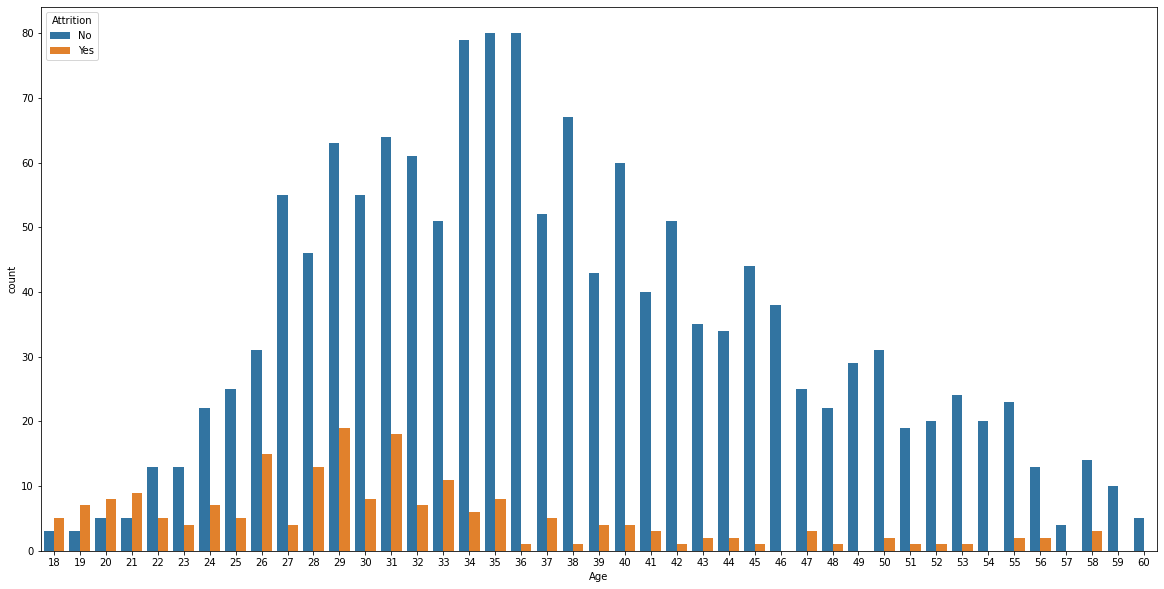

In [8]:
plt.figure(figsize=(20,10))
sns.countplot(x='Age',hue='Attrition',data=data_df)

### Visualization 2

In [28]:
data_df.groupby('Attrition')['MonthlyIncome'].mean().sort_values().reset_index()

,Attrition,MonthlyIncome
0,Yes,4024.246231
1,No,6852.301963


<AxesSubplot:xlabel='DistanceFromHome', ylabel='count'>

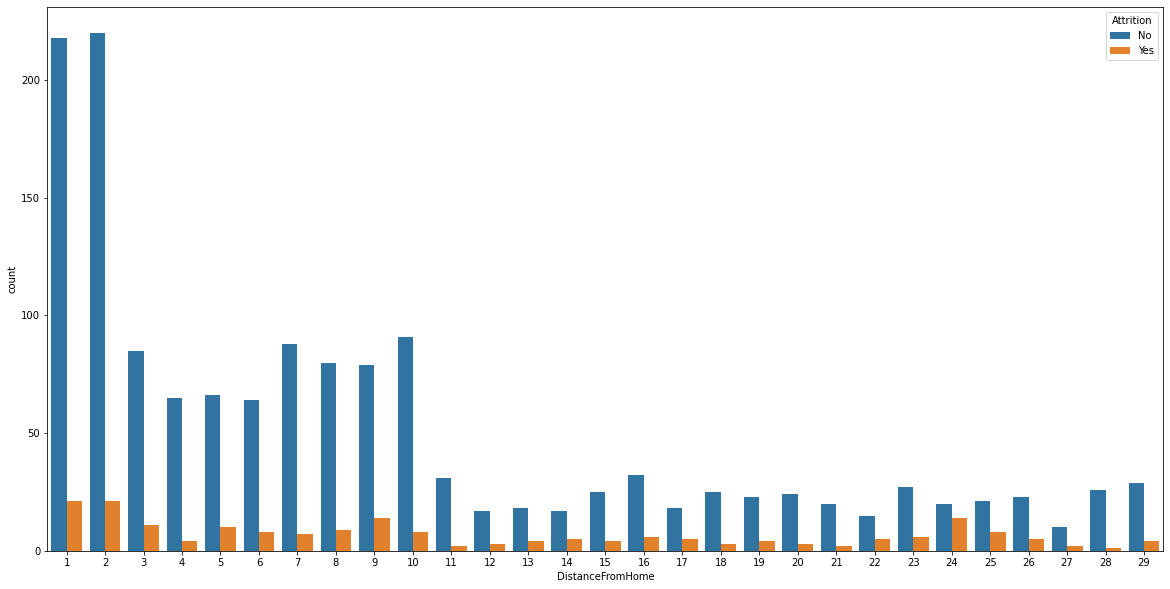

In [29]:
plt.figure(figsize=(20,10))
sns.countplot(x='DistanceFromHome',hue='Attrition',data=data_df)

### Visualization 3

In [30]:
px.histogram(data_df,x="Department",color="Attrition",barmode="group",text_auto=".2f",template="plotly_dark",
             title = "Percentage of Department Type")

In [31]:
px.histogram(data_df,x="EducationField",color="Attrition",barmode="group",text_auto=".2f",template="plotly_dark",
             title = "Percentage of EducationField Type")


In [32]:
px.histogram(data_df,x="JobRole",color="Attrition",barmode="group",text_auto=".2f",template="plotly_dark",
             title = "Percentage of EducationField Type")

### Visualization 4

<AxesSubplot:xlabel='Gender', ylabel='count'>

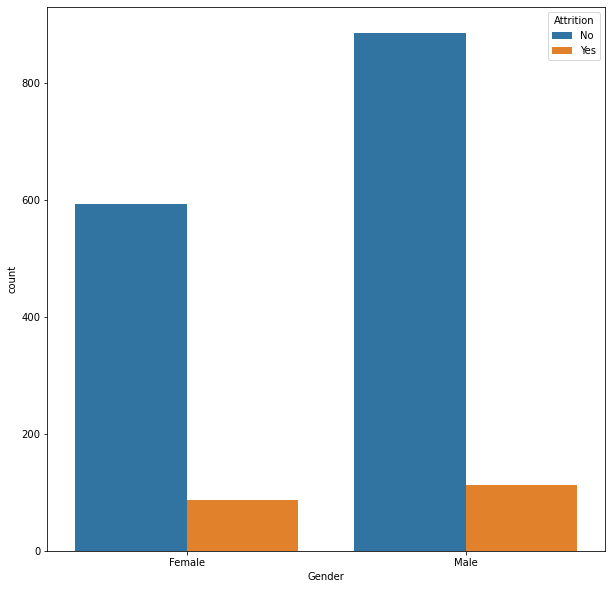

In [34]:
plt.figure(figsize=(10,10))
sns.countplot(x='Gender',hue='Attrition',data=data_df)

#### Breakdown of all the available datapoints 

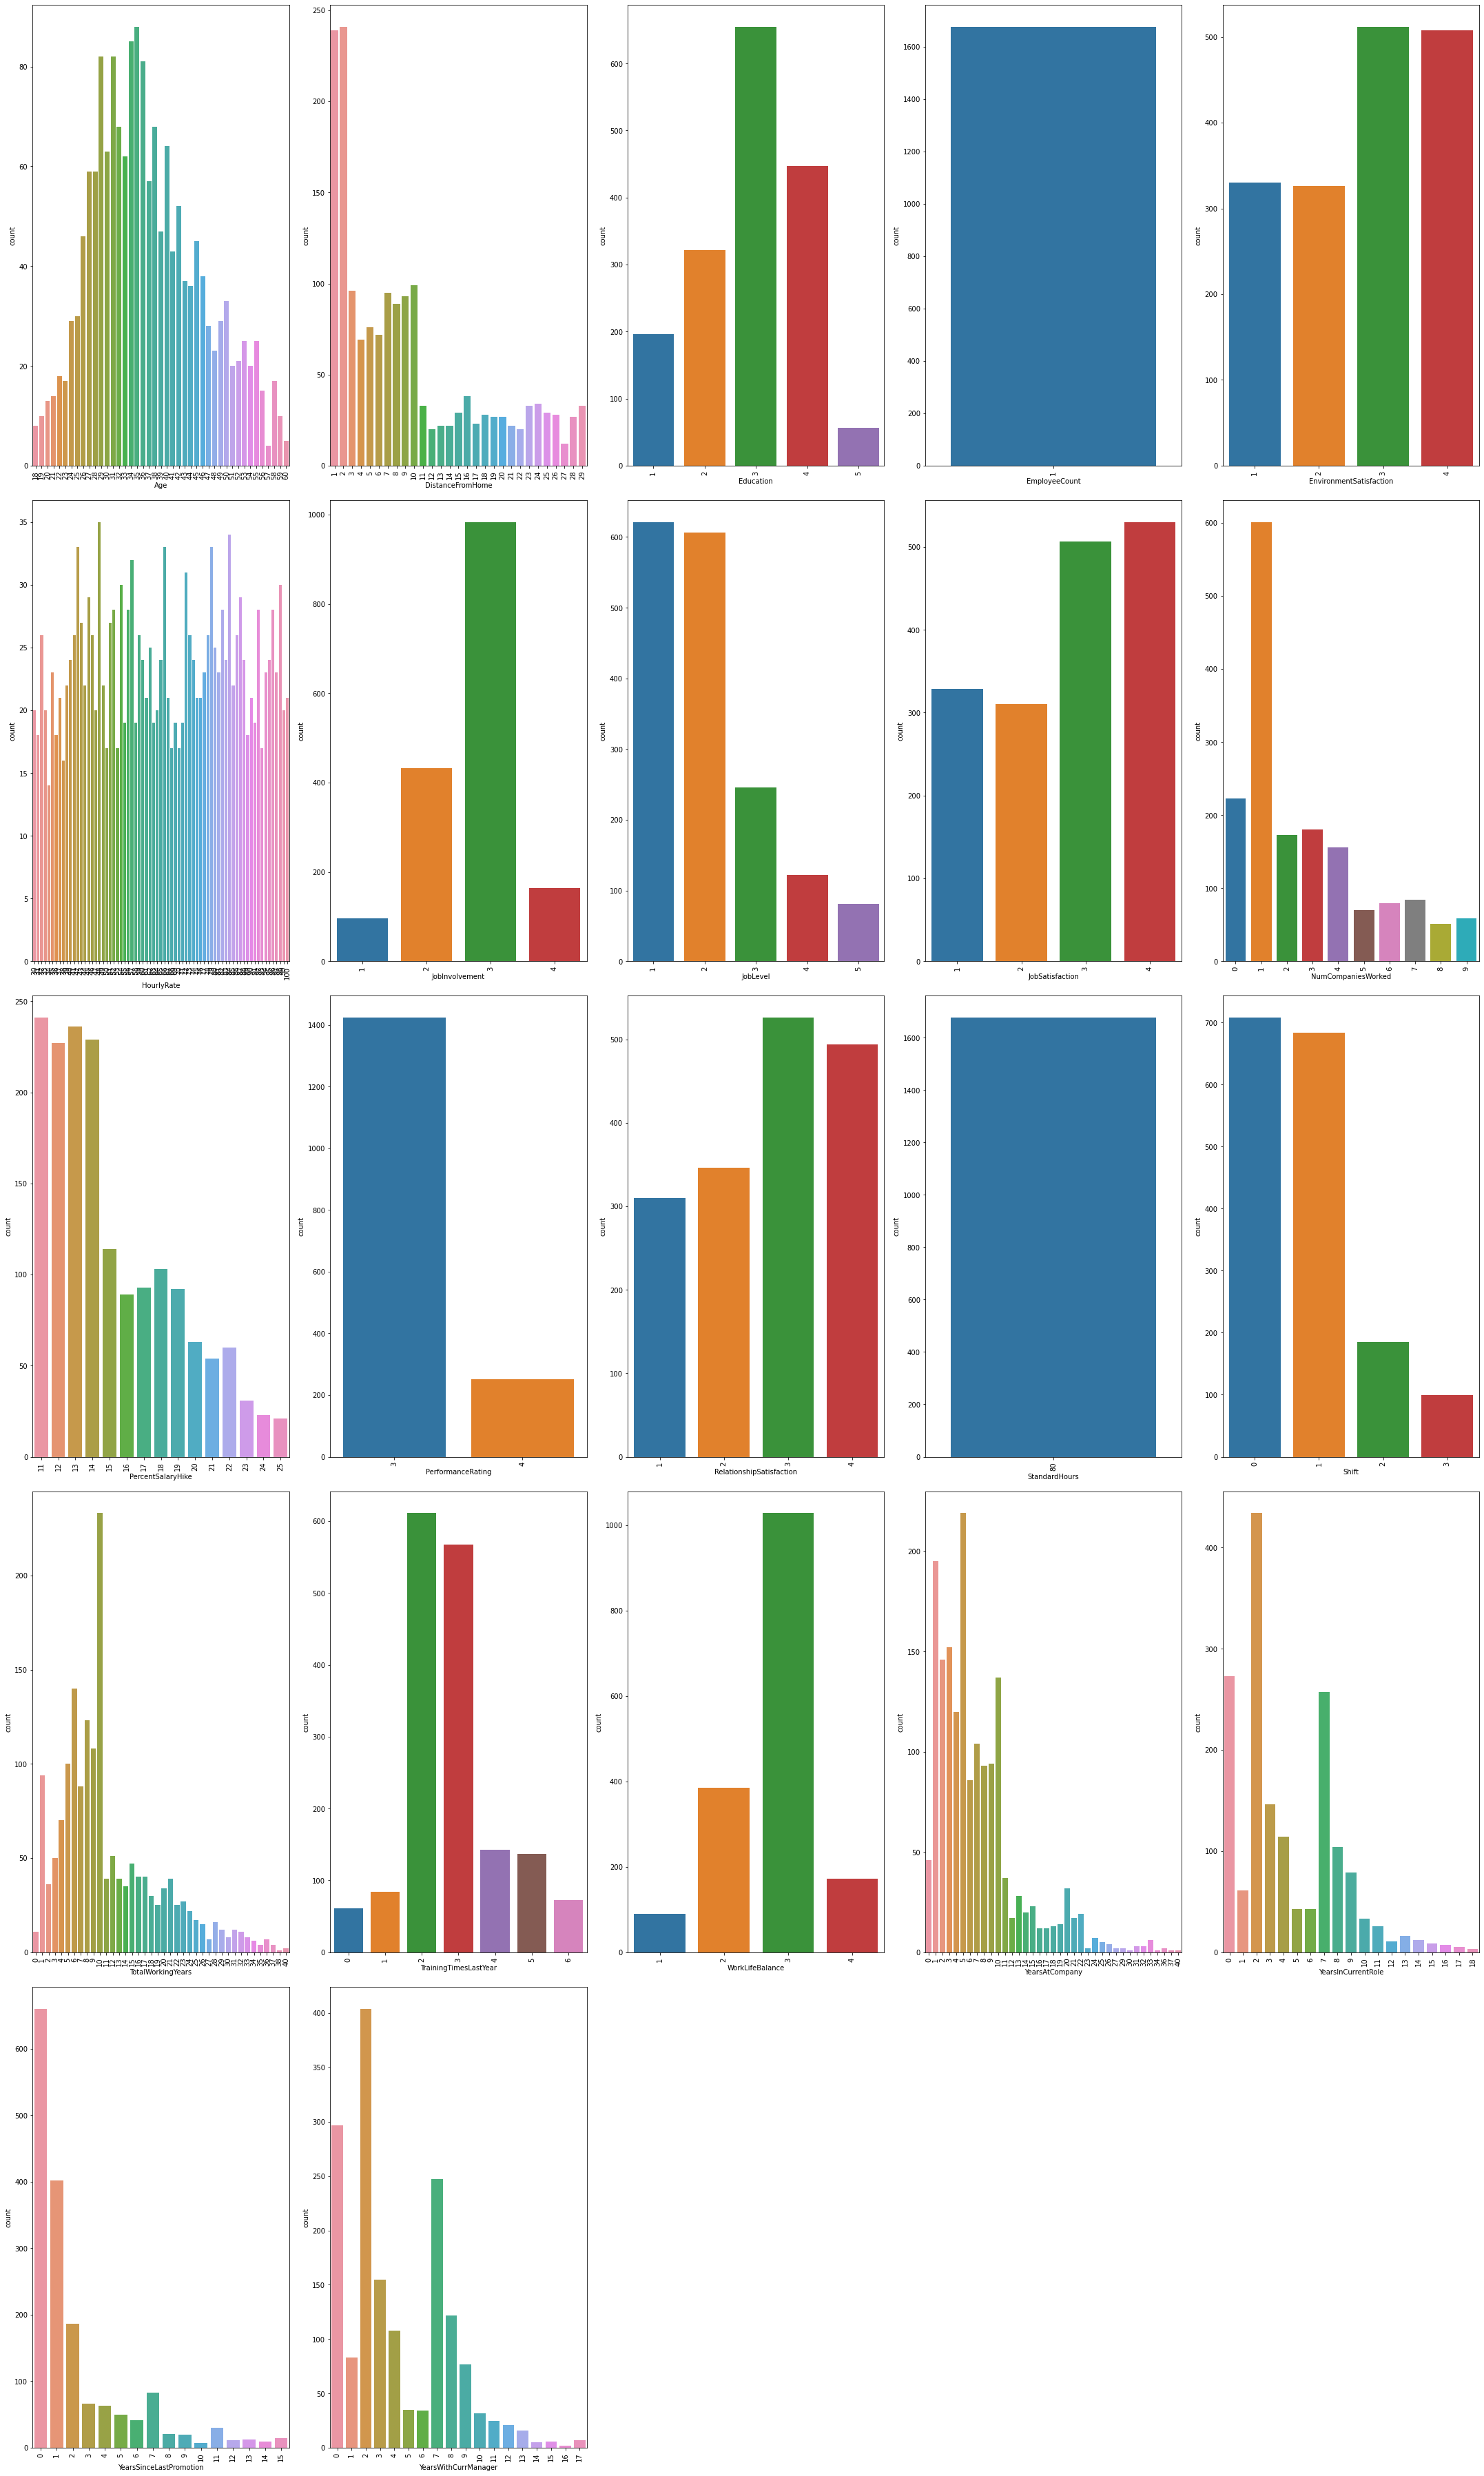

In [35]:
plt.figure(figsize=(30,50))
for index,column in enumerate(num_col):
    plt.subplot(5,5,index+1)
    sns.countplot(data=num_col,x=column)
    plt.xticks(rotation = 90)
plt.tight_layout(pad = 1.0)
plt.show()

### Observations:
* Maternity departments had the highest rate of attrition followed by cardiology and neurology
* attrition rates had the highest peak at 29 years old 
* 26-35 years old saw the highest range of attrition
* 42 years old and older saw the least attrition rates
* More men where likely to leave than women but Men also were more accounted for than women in the healthcare field
* Human resources were the least likely to have people quit
* Life Sciences were the Education field with the highest amount of attrition
* people that lived closer to their jobs were more likely to leave
